In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I'll use pandas dataframes to manipulate and filter the data based on the query
# And I'll use matplotlib to visualize the resulting data

In [2]:
df_titles = pd.read_csv('imdb_titles.tsv', delimiter='\t', low_memory=False)
df_names = pd.read_csv('imdb_names.tsv', delimiter='\t')
df_crew = pd.read_csv('imdb_crew.tsv', delimiter='\t')
df_rating = pd.read_csv('imdb_rating.tsv', delimiter='\t')

# I've imported the IMDB datasets for this project as dataframe object using pandas.read_csv
# Note that the IMDB datasets are tab seperated value files, so the delimiter is set to '\t'

In [3]:
df_titles = df_titles[(df_titles.titleType=='movie') | (df_titles.titleType=='short')]
df_titles = df_titles.merge(df_rating, how='left', on='tconst')

# Reduces titles to only include feature films and short films
# Adds IMDB rating and number of votes for each record in the titles dataframe

In [4]:
df_crew = df_crew[df_crew.tconst.isin(df_titles.tconst)]

# Reduces crew dataframe to only include titles in the newly reduced titles dataframe

In [5]:
df_names = df_names[df_names.nconst.isin(df_crew.directors)]

# Reduces the names dataframe to only include directors with credits in the crew dataframe

In [57]:
def get_films(director):
    films = df_crew[df_crew.directors==director].tconst
    films = df_titles[df_titles.tconst.isin(films)]
    return films

# Receives a director(nconst) and filters the crew dataframe by the director and returns the resulting titles(tcosnt)
# Filters the titles dataframe, using the titles in films

In [95]:
def plot_films(films):
    shorts = films[films.titleType=='short']
    features = films[films.titleType=='movie']
    plt.figure(figsize=(15,10))
    plt.scatter(shorts.startYear, shorts.averageRating, s=np.divide(shorts.numVotes, 100))
    plt.scatter(features.startYear, features.averageRating, s=np.divide(features.numVotes, 100))
#     plt.axis([1920, 2020])
#     plt.legend(['Shorts', 'Features'], loc=4)
    plt.show()
    
# Receives a list of films(tconst's)
# Creates seperate dataframes for short and feature-length titles
# Plots both sets of titles using scatter
# Depicts averageRating(on IMDB) over startYear(release year), with size representing numVotes(on IMDB)

In [96]:
def choose_director():
    text = input('Enter a Director\'s name: ')
    if text not in df_names.primaryName.values:
        print('{} is not in our list'.format(text))
        choose_director()
    else:
        results = df_names[df_names.primaryName==text]
        if len(results.nconst.values) > 1:
            most_votes = 0
            for director in results.nconst.values:
                votes = get_films(director).numVotes.sum()
                if votes > most_votes:
                    most_votes = votes
                    result = director
            plot_films(get_films(result))
        else:         
            plot_films(get_films(results.nconst.values[0]))
            
# Receives text input
# Restarts with a warning if input is unusable
# Filter for records in names dataframe with primaryName matching input text
# If multiple matches are returned, check the total sum of numVotes and return the director(tconst) with the highest
# Pass director into get_films and returned films into plot_films

Enter a Director's name: 
 is not in our list
Enter a Director's name: Taika Waititi


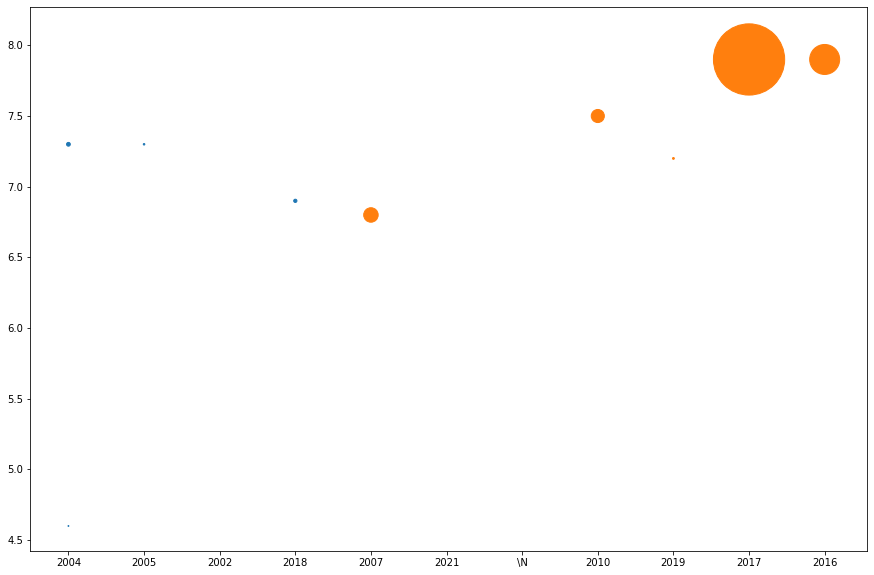

In [97]:
choose_director()